In [29]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [30]:
data = pd.read_csv('2023cleaned.csv')
age_order = [
    "21-25", "26-30", "31-35", "36-40", "41-45", "46-50",
    "51-55", "56-60", "61-65", "66-70", "71-75",
]
relationship_map = {
    "Married": "Married",
    "Single, never married": "Single",
    "In a relationship, but not married": "Single",
    "Divorced": "Single",
    "Widowed": "Single",
    "Divorced - In a relationship, but not married": "Single",
    "Widowed - In a relationship, but not married": "Single",
    "Divorced - Remarried": "Married",
    "Widowed - Remarried": "Married",
    }
relationship_map_mod = {
    "Married": "Has Ever Married",
    "Single, never married": "Single",
    "In a relationship, but not married": "Single",
    "Divorced": "Has Ever Married",
    "Widowed": "Has Ever Married",
    "Divorced - In a relationship, but not married": "Has Ever Married",
    "Widowed - In a relationship, but not married": "Has Ever Married",
    "Divorced - Remarried": "Has Ever Married",
    "Widowed - Remarried": "Has Ever Married",
    }
def clean_data(maptype="normal"):
    test_data = (data[['Relationship', 'Retire age']]).dropna()
    # remap relationship and age order
    test_data = test_data[test_data['Retire age'] != 'Undecided']
    if maptype == "normal":
        test_data["Relationship"] = test_data['Relationship'].map(relationship_map)
    else:
        test_data["Relationship"] = test_data['Relationship'].map(relationship_map_mod)
    print(test_data['Relationship'].value_counts())
    return test_data


Relationship
Married    710
Single     591
Name: count, dtype: int64


C:\Users\Neville\AppData\Local\Temp\ipykernel_13372\4049081364.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_data = (test1_data.groupby(['Retire age', 'Relationship']).size() / test1_data.groupby(['Relationship']).size())


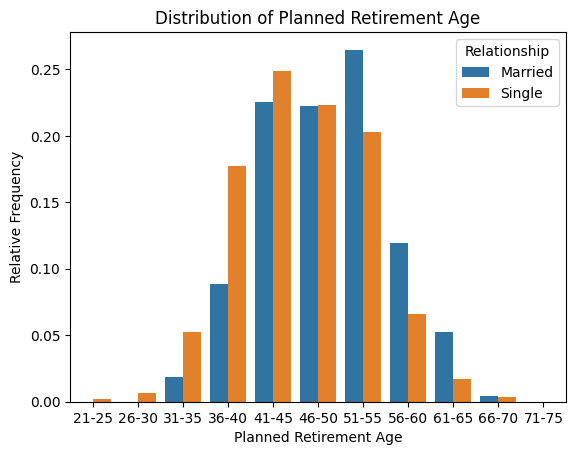

Chi2: 63.675136156755855, p-value: 2.6096778596115527e-10


In [31]:
# chi2 contingency
test1_data = clean_data()
test1_data['Retire age'] = pd.Categorical(test1_data['Retire age'], categories=age_order, ordered=True)
relative_data = (test1_data.groupby(['Retire age', 'Relationship']).size() / test1_data.groupby(['Relationship']).size())
relative_data = relative_data.reset_index().rename({0:'prop'}, axis=1)
sns.barplot(x='Retire age', hue='Relationship', y='prop', data=relative_data)

plt.xlabel('Planned Retirement Age')
plt.ylabel('Relative Frequency')
plt.title('Distribution of Planned Retirement Age')
plt.show()
contin = pd.crosstab(test1_data['Relationship'], test1_data['Retire age'])
chi2, p, dof, expected = stats.chi2_contingency(contin)
print(f"Chi2: {chi2}, p-value: {p}")

In [32]:
# t-test
def get_median_in_range(age_range):
    if age_range == "71+":
        return 73
    low, high = map(int, age_range.split('-'))
    return (low + high) // 2

test2_data = clean_data()
test2_data['Retire age'] = test2_data['Retire age'].apply(get_median_in_range)

print(stats.ttest_ind(
    test2_data[test2_data['Relationship'] == 'Married']['Retire age'],
    test2_data[test2_data['Relationship'] == 'Single']['Retire age']
))
print("Single Retirement Age Mean:", test2_data[test2_data['Relationship'] == 'Single']['Retire age'].mean())
print("Married Retirement Age Mean:", test2_data[test2_data['Relationship'] == 'Married']['Retire age'].mean())

Relationship
Married    710
Single     591
Name: count, dtype: int64
TtestResult(statistic=np.float64(7.93668219355062), pvalue=np.float64(4.455137406488678e-15), df=np.float64(1299.0))
Single Retirement Age Mean: 46.011844331641285
Married Retirement Age Mean: 49.20422535211268


Relationship
Has Ever Married    745
Single              556
Name: count, dtype: int64


C:\Users\Neville\AppData\Local\Temp\ipykernel_13372\2232033426.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  relative_data = (test3_data.groupby(['Retire age', 'Relationship']).size() / test3_data.groupby(['Relationship']).size())


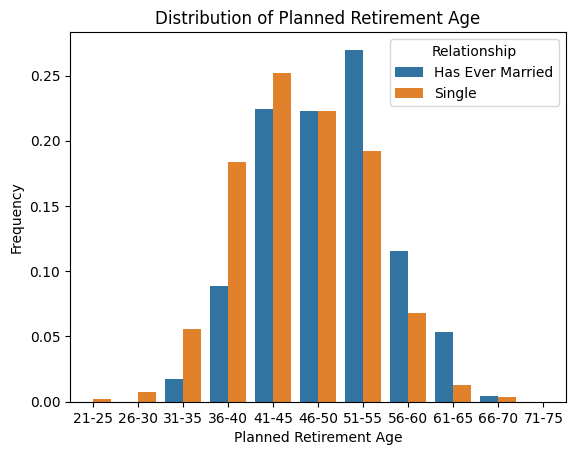

Chi2: 74.04150901801646, p-value: 2.442678273624953e-12


In [33]:
# additional: if married refered to ever having been married

test3_data = clean_data('mod')
test3_data['Retire age'] = pd.Categorical(test3_data['Retire age'], categories=age_order, ordered=True)
relative_data = (test3_data.groupby(['Retire age', 'Relationship']).size() / test3_data.groupby(['Relationship']).size())
relative_data = relative_data.reset_index().rename({0:'prop'}, axis=1)
sns.barplot(x='Retire age', hue='Relationship', y='prop', data=relative_data)
plt.xlabel('Planned Retirement Age')
plt.ylabel('Frequency')
plt.title('Distribution of Planned Retirement Age')
plt.show()
# chi2 contingency
contin = pd.crosstab(test3_data['Relationship'], test3_data['Retire age'])
chi2, p, dof, expected = stats.chi2_contingency(contin)
print(f"Chi2: {chi2}, p-value: {p}")

Contributors
1    654
2    646
Name: count, dtype: int64


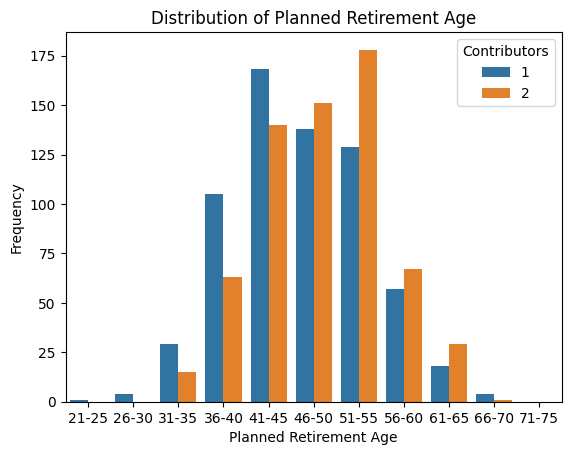

Chi2: 36.372021656158374, p-value: 7.264024881282562e-05


In [34]:
# What if we base on number of contributors?
contributor_data = (data[['Contributors', 'Retire age']]).dropna()
# remap relationship and age order
contributor_data = contributor_data[contributor_data['Retire age'] != 'Undecided']
contributor_data = contributor_data[contributor_data['Contributors'].isin(['1', '2'])]
print(contributor_data['Contributors'].value_counts())
sns.countplot(data=contributor_data, x='Retire age', order=age_order, hue='Contributors', hue_order=['1', '2'])
plt.xlabel('Planned Retirement Age')
plt.ylabel('Frequency')
plt.title('Distribution of Planned Retirement Age')
plt.show()
# chi2 contingency
contin = pd.crosstab(contributor_data['Contributors'], contributor_data['Retire age'])
chi2, p, dof, expected = stats.chi2_contingency(contin)
print(f"Chi2: {chi2}, p-value: {p}")

In [35]:
# t test
def get_median_in_range(age_range):
    if age_range == "71+":
        return 73
    low, high = map(int, age_range.split('-'))
    return (low + high) // 2

contributor_data['Retire age'] = contributor_data['Retire age'].apply(get_median_in_range)
print(stats.ttest_ind(
    contributor_data[contributor_data['Contributors'] == '1']['Retire age'],
    contributor_data[contributor_data['Contributors'] == '2']['Retire age']
))

print("Single Retirement Age Mean:", contributor_data[contributor_data['Contributors'] == '1']['Retire age'].mean())
print("Married Retirement Age Mean:", contributor_data[contributor_data['Contributors'] == '2']['Retire age'].mean())

TtestResult(statistic=np.float64(-5.103119496615067), pvalue=np.float64(3.8380083104305916e-07), df=np.float64(1298.0))
Single Retirement Age Mean: 46.71559633027523
Married Retirement Age Mean: 48.78947368421053


Contributors      1300.0
alt retire age    1300.0
dtype: float64


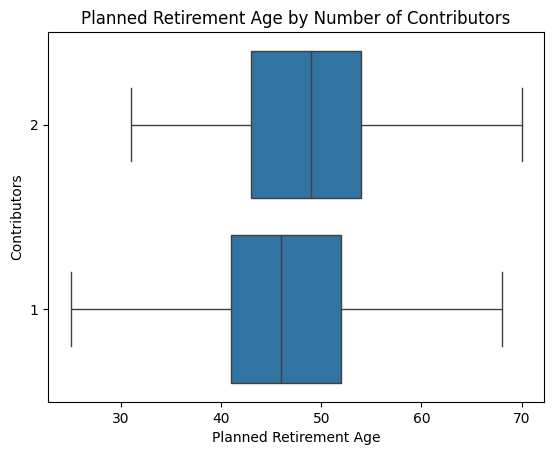

In [36]:
def expand_row(val):
    return list(np.arange(val-2, val+3))

contributor_data['alt retire age'] = contributor_data['Retire age'].apply(expand_row)
exploded = contributor_data[['Contributors', 'alt retire age']].explode('alt retire age')
exploded['alt retire age'] = exploded['alt retire age'].astype(int)

sns.boxplot(x='alt retire age', y='Contributors', data=exploded, showfliers=False)
plt.xlabel('Planned Retirement Age')
plt.title('Planned Retirement Age by Number of Contributors')
print(exploded.count()/5)